<a href="https://colab.research.google.com/github/somyaup/PIB-using-PINN/blob/main/Quantum_Harmonic_Oscilator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import myOptimizers as optims
#import torch.optim as optims
import importlib
import os
import numpy

# note:
Install my optimiser from [here]( https://drive.google.com/file/d/1OWXGkaVHQNIh7TkzsCY3ZY1Zx2i6CWBj/view?usp=sharing) and upload in files.

# New section

# **Functions**
##iћ d/dt |**Ψ**(x,t)⟩=**H** |**Ψ**(x,t)⟩

Particle in a box of length L from x=0 to x=L

##wavefuction :wf=Ψ
##differential equation =iћ d/dt |**Ψ**(x,t)⟩+(E-m(wx)^2)

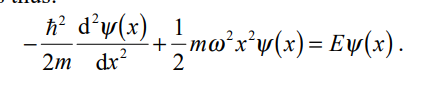

In [ ]:
def init_weights(scale, network_size, rs = npr.RandomState(42)):
  return [(rs.randn(inSize, outSize) * scale,
          rs.rand(outSize) * scale)
          for inSize, outSize in zip(network_size[:-1], network_size[1:])]

# New section

In [ ]:
def activation(x):
  return (2 / (1.0 + np.exp(-2*x))) - 1

def psi(nnparams, input):
  initInput = input
  xtilda = (initInput - x0)/(x1 - x0)
 
  for w,b in nnparams:
    output = np.dot(input, w) + b
    input = activation(output)
  
  #return (1-xtilda)*psi0 + xtilda*psi1 + (1-np.exp(xtilda * (1-xtilda)))*output
  return  (1-np.exp(xtilda * (1-xtilda)))*output
dpsi = elementwise_grad(psi, 1)
ddpsi = elementwise_grad(dpsi, 1)

In [ ]:
def objective(params, step):
  pcrc1 = 15
  nnparams = params["nn"]
  E = params["E"]
  wf = psi(nnparams, x)
  diffeq =  ddpsi(nnparams, x) + np.multiply(wf,E-x**2)
  y2 = wf**2 #probability fn
  prob = np.sum((y2[1:] + y2[0:-1]) / 2 * (x[1:] - x[0:-1]))

  mean = np.mean(diffeq**2)
  loss = mean + (1-prob)**2# + (pcrc1/prob + pcrc1*prob)

  if(step%100==0):
    print ("Iteration " + str(step) + "\ndiffeq = " + str(mean) + "prob = " + str(prob))
    print ("loss = " + str(loss) + " E = " + str(params['E']))
    print ("--------------------------------------------------------------")

  return loss

#DO **NOT** RUN

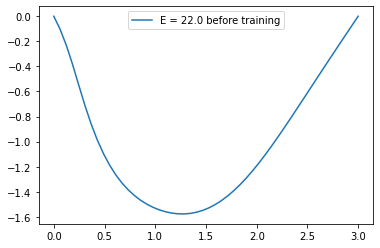

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)

plt.plot(x, y, label='E = '+str(Einit)+' before training')  # Plotting the NN output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

In [ ]:
def sgd(grad, x, callback=None, num_iters=200, step_size=0.1, mass=0.9):
    """Stochastic gradient descent with momentum.
    grad() must have signature grad(x, i), where i is the iteration number."""
    velocity = np.zeros_like(x)
    for i in range(num_iters):
        g = grad(x, i)
        if callback: callback(x, i, g)
        velocity = mass * velocity - (1.0 - mass) * g
        x = x + step_size * velocity
    return x

# **Intializations**

In [ ]:
psi0 = 0 # Boundry condition
psi1 = 0 # Boundry condition
l = 1 # Length of 1D box
n = 2 # Energy level to be found
scale = 2 # For initialization
divs = 600 # Divisions of x scale

x0 = -3
x1 = 3

In [ ]:
#Defining the network
nn_params = init_weights(scale/(x1-x0), network_size = [1,32,32,1])

#Initializing a random Eighen Function
Einit = 11.0
params = {"nn" : nn_params, "E" : Einit}

#input space
x = np.linspace(x0, x1, divs)[:, None]

# **Optimizer**

In [ ]:
optims = importlib.reload(optims)

params = optims.adam(grad(objective), params, step_size = 0.001, num_iters = 10000)
"""optim.SGD([
                {'params': model.base.parameters()},
                {'params': model.classifier.parameters(), 'lr': 1e-3}
            ], lr=1e-2, momentum=0.9)"""

Iteration 0
diffeq = Autograd ArrayBox with value 0.18619160619313793prob = Autograd ArrayBox with value 0.014294014539557648
loss = Autograd ArrayBox with value 1.1578078959656797 E = Autograd ArrayBox with value 11.0
--------------------------------------------------------------
Iteration 100
diffeq = Autograd ArrayBox with value 0.0004777164779097748prob = Autograd ArrayBox with value 0.00022433175045042238
loss = Autograd ArrayBox with value 1.0000291033017432 E = Autograd ArrayBox with value 10.974428842518204
--------------------------------------------------------------
Iteration 200
diffeq = Autograd ArrayBox with value 0.00017134893740493768prob = Autograd ArrayBox with value 9.980560581812555e-05
loss = Autograd ArrayBox with value 0.9999717476869275 E = Autograd ArrayBox with value 10.970834593862644
--------------------------------------------------------------
Iteration 300
diffeq = Autograd ArrayBox with value 9.17510062493941e-05prob = Autograd ArrayBox with value 7.3284

"optim.SGD([\n                {'params': model.base.parameters()},\n                {'params': model.classifier.parameters(), 'lr': 1e-3}\n            ], lr=1e-2, momentum=0.9)"

#Actual  Plot

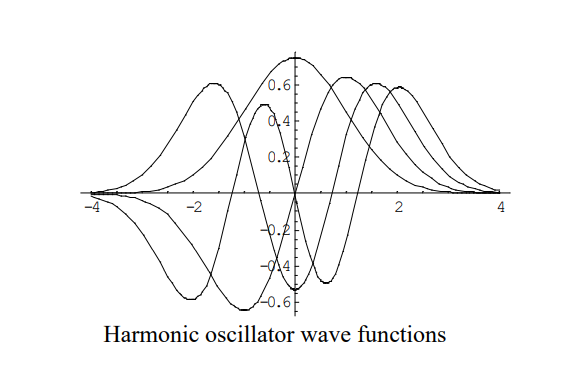


#Model Plots varying V

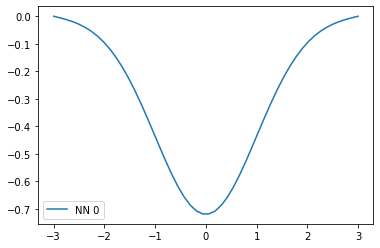

In [ ]:
#import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label='NN 0')  # Plotting the NN output
c=numpy.zeros(50)
c[0]=1
Y =numpy.exp(-x*x)* numpy.polynomial.hermite.hermval(X, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

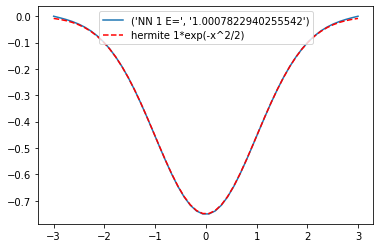

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 1 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[0]=0.75 # 3/4
Y =-numpy.exp(-x*x/2)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2/2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

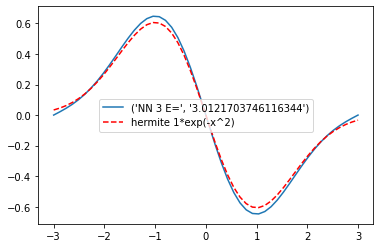

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 3 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[1]=0.5 # 3/6
Y =-numpy.exp(-x*x/2)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2)')  # Plotting the expected output
plt.legend()


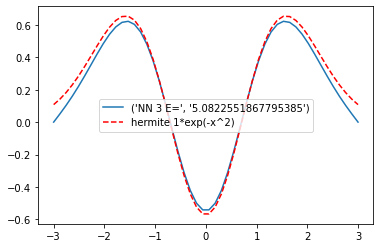

In [ ]:


import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 3 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[2]=2.0/7
Y =numpy.exp(-x*x/2)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

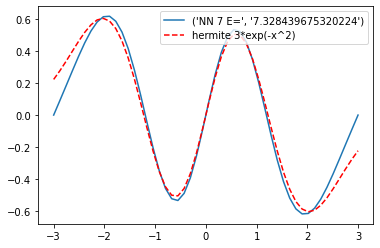

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 7 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[3]=-1.0/9
Y =numpy.exp(-x*x/2)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 3*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

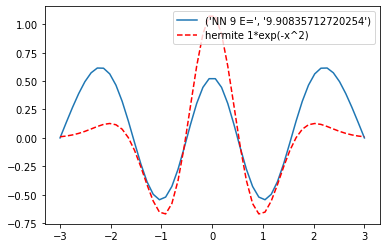

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 10 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[4]=1/11
Y =numpy.exp(-x*x)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'g--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 9 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[4]=1/11
Y =numpy.exp(-x*x)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'g--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

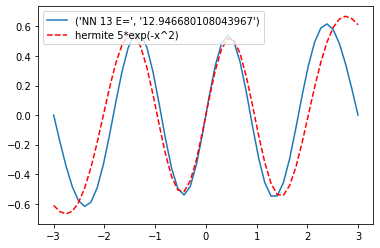

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label=('NN 13 E=',str(params['E'])))  # Plotting the NN output
c=numpy.zeros(50)
c[5]=1.0/52*3/4
Y =numpy.exp(-x*x/2)* numpy.polynomial.hermite.hermval(x, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 5*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

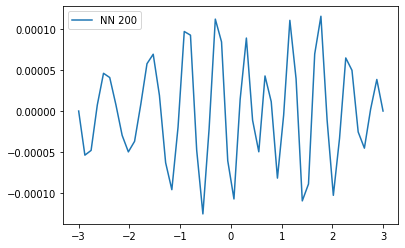

In [ ]:
import matplotlib.pyplot as plt
x = np.linspace(x0, x1)[:, None]
y = psi(params['nn'], x)
plt.plot(x, y, label='NN 200')  # Plotting the NN output
c=numpy.zeros(50)
c[15]=1
Y =numpy.exp(-x*x)* numpy.polynomial.hermite.hermval(X, c, tensor=True)
plt.plot(x, Y,'r--', label='hermite 1*exp(-x^2)')  # Plotting the expected output
#plt.plot(x, np.sqrt(2/l) * np.sin(n*np.pi * (x-x0)/l), 'r--', label='analytical')  # Plotting the actual wavefuncion
plt.legend()

In [ ]:
!git clone https://github.com/anuwu/Particle-in-a-Box

Cloning into 'Particle-in-a-Box'...
remote: Enumerating objects: 946, done.
remote: Counting objects: 100% (946/946), done.
remote: Compressing objects: 100% (842/842), done.
remote: Total 946 (delta 75), reused 930 (delta 65), pack-reused 0
Receiving objects: 100% (946/946), 16.36 MiB | 32.09 MiB/s, done.
Resolving deltas: 100% (75/75), done.
